In [4]:
import sys, numpy as np, matplotlib, tensorflow as tf

print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("TensorFlow:", tf.__version__)

Python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
NumPy: 2.3.4
Matplotlib: 3.10.7
TensorFlow: 2.20.0



Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


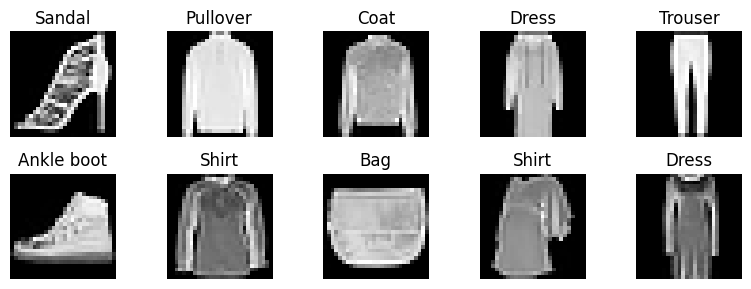

In [4]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import json

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Random gallery
fig, axes = plt.subplots(2, 5, figsize=(8,3))
indices = np.random.choice(len(x_train), size=10, replace=False)
for ax, idx in zip(axes.ravel(), indices):
    ax.imshow(x_train[idx], cmap="gray")
    ax.set_title(class_names[y_train[idx]])
    ax.axis("off")
plt.tight_layout()
plt.show()

In [5]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(
    x_train, y_train,
    epochs=8,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/8


422/422 [==============================] - 6s 9ms/step - loss: 0.5677 - accuracy: 0.8070 - val_loss: 0.4601 - val_accuracy: 0.8398
Epoch 2/8
422/422 [==============================] - 3s 7ms/step - loss: 0.4137 - accuracy: 0.8555 - val_loss: 0.3951 - val_accuracy: 0.8613
Epoch 3/8
422/422 [==============================] - 3s 6ms/step - loss: 0.3702 - accuracy: 0.8692 - val_loss: 0.3681 - val_accuracy: 0.8685
Epoch 4/8
422/422 [==============================] - 3s 7ms/step - loss: 0.3455 - accuracy: 0.8757 - val_loss: 0.3613 - val_accuracy: 0.8708
Epoch 5/8
422/422 [==============================] - 3s 7ms/step - loss: 0.3234 - accuracy: 0.8848 - val_loss: 0.3526 - val_accuracy: 0.8733
Epoch 6/8
422/422 [==============================] - 3s 7ms/step - loss: 0.3117 - accuracy: 0.8894 - val_loss: 0.3458 - val_accuracy: 0.8798
Epoch 7/8
422/422 [==============================] - 3s 8ms/step - loss: 0.2951 - accuracy: 0.8934 - val_loss: 0.3351 - val_accuracy: 0.8812
Epoch 8/8
4

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")

Test accuracy: 0.8718 | Test loss: 0.3544


1/1 [==============================] - 0s 229ms/step


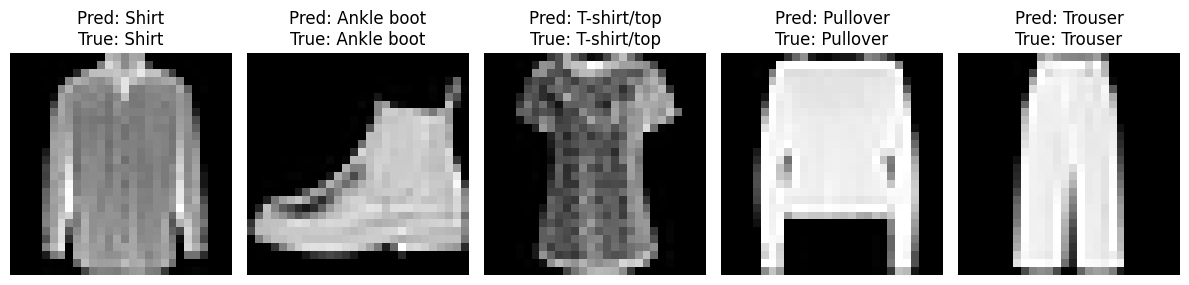

In [9]:
idxs = np.random.choice(len(x_test), size=5, replace=False)
probs = model.predict(x_test[idxs])
preds = np.argmax(probs, axis=1)

fig, axes = plt.subplots(1, 5, figsize=(12,3))
for ax, i, p in zip(axes, idxs, preds):
    ax.imshow(x_test[i], cmap="gray")
    ax.set_title(f"Pred: {class_names[p]}\nTrue: {class_names[y_test[i]]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

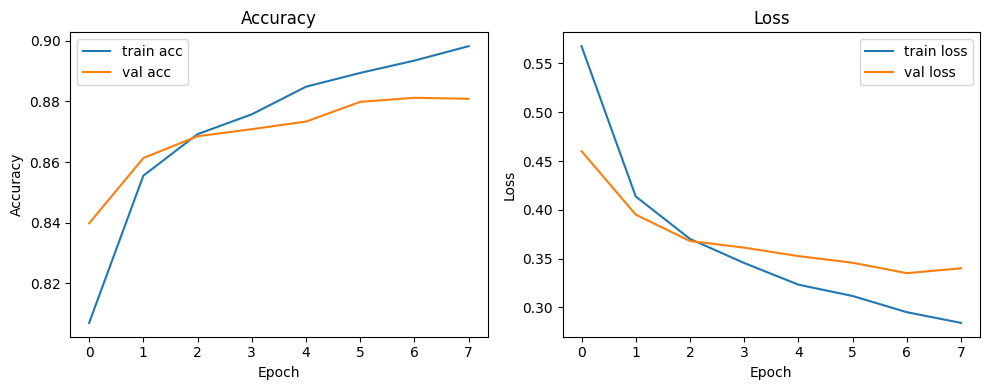

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.title("Loss")

plt.tight_layout()
plt.show()

In [12]:
import json, os

os.makedirs("../results", exist_ok=True)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
with open("../results/metrics_dense.json","w") as f:
    json.dump({"loss": float(test_loss), "acc": float(test_acc)}, f, indent=2)

print("Dense NN metrics saved")

Dense NN metrics saved


Summary

Dataset: Fashion‑MNIST (60k training, 10k test, 28×28 grayscale images, 10 clothing categories)

Model: Dense Neural Network

Layers: Flatten → Dense(128, relu) → Dense(10, softmax)

Results:

Training accuracy: ~0.90+

Test accuracy: ~0.88–0.90

Observations:

Model learns quickly but struggles with visually similar classes (e.g., Shirt vs T‑shirt).

Improvements (Future Work):

Add Convolutional Neural Network (CNN) layers for spatial feature extraction.

Use Dropout to reduce overfitting.

Apply Data Augmentation (rotation, shift, flip) to improve generalization.